In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Temoso Magana\Desktop\Orange Quality Data.csv")
df

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [3]:
df.isnull().sum()                                  #checking for null values

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [4]:
df.nunique()                                      #finding unique values

Size (cm)              41
Weight (g)            131
Brix (Sweetness)       82
pH (Acidity)           44
Softness (1-5)          9
HarvestTime (days)     22
Ripeness (1-5)          8
Color                   5
Variety                24
Blemishes (Y/N)        12
Quality (1-5)           8
dtype: int64

In [5]:
#Measures of Location

In [6]:
Weight_ = df['Weight (g)']                        #mean
statistics.mean(Weight_) 

205.1286307053942

In [7]:
statistics.median(Weight_)                         #median

205

In [8]:
statistics.mode(Weight_)                           #mode 

220

In [9]:
Weight = (df['Weight (g)'])                       #Percentile 25%
Q1 = np.percentile(Weight, 25)
Q1

155.0

In [10]:
Weight = (df['Weight (g)'])                       #Percentile 75%
Q3 = np.percentile(Weight, 75)
Q3

252.0

In [11]:
df.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)  #Quartiles of each numeric column

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
0.25,6.9,155.0,8.5,3.2,2.0,11.0,3.0,3.0
0.50,7.8,205.0,11.0,3.4,3.0,15.0,4.0,4.0
0.75,8.7,252.0,13.4,3.8,4.0,20.0,4.5,4.5


In [12]:
#Measures of Variability

In [13]:
Range = max(df['Weight (g)']) -  min(df['Weight (g)'])        #Range
Range

200

In [15]:
Weight = (df['Weight (g)'])                                   #Interquartile Range
Q1 = np.percentile(Weight, 25)
Q3 = np.percentile(Weight, 75)
IQR = Q3 - Q1
IQR

97.0

In [16]:
statistics.variance(Weight_)                                  #Variance

3187.8458852005533

In [17]:
statistics.stdev(Weight_)                                    #Standard deviation

56.46101208090901

In [18]:
statistics.stdev(Weight_) / statistics.mean(Weight_)*100    #Coefficient of variation

27.524686284284876

In [19]:
#Measures of association 

In [20]:
x = (df['Brix (Sweetness)'])                                 #Covariance      
y = (df['Ripeness (1-5)']) 
cv = np.cov(x,y)
cv

array([[7.62006259, 0.48129495],
       [0.48129495, 1.45254149]])

In [21]:
x = (df['Brix (Sweetness)'])                                 #Correlation coefficient                   
y = (df['Ripeness (1-5)']) 
cr = np.corrcoef(x,y)
cr

array([[1.        , 0.14466643],
       [0.14466643, 1.        ]])

In [22]:
#Charts/Graphs

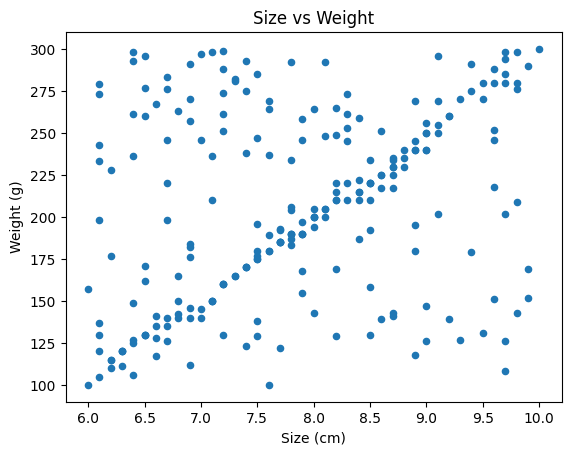

In [23]:
df.plot(kind='scatter', x='Size (cm)', y='Weight (g)')      #Scatter 
plt.title('Size vs Weight')
plt.xlabel('Size (cm)')
plt.ylabel('Weight (g)')
plt.show()

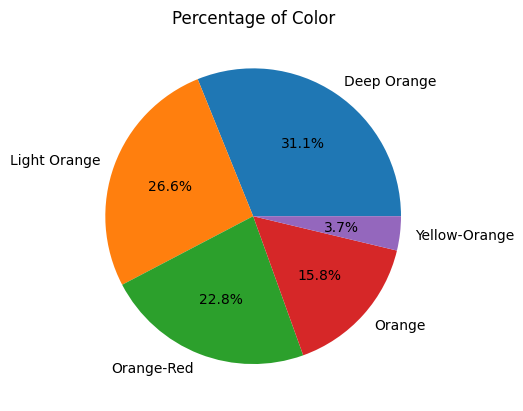

In [24]:
color_counts = df['Color'].value_counts()                #Pie
color_counts.plot(kind='pie',autopct='%1.1f%%')
plt.title('Percentage of Color')
plt.ylabel('')
plt.show()

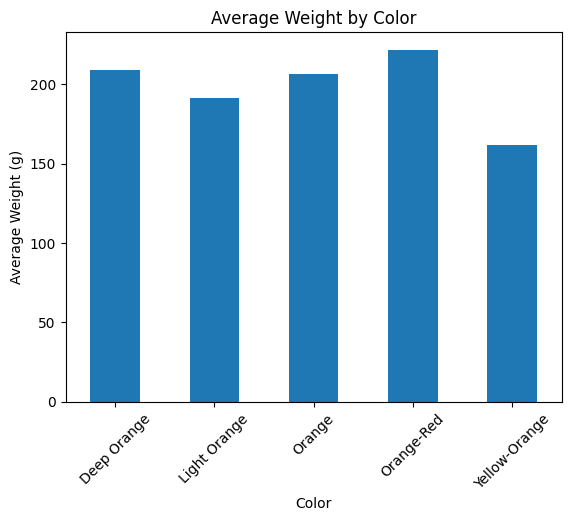

In [25]:
average_weight_by_color = df.groupby('Color')['Weight (g)'].mean()      #Bar
average_weight_by_color.plot(kind='bar')
plt.title('Average Weight by Color')
plt.xlabel('Color')
plt.ylabel('Average Weight (g)')
plt.xticks(rotation=45)  #x-axis labels rotated for better readability
plt.show()

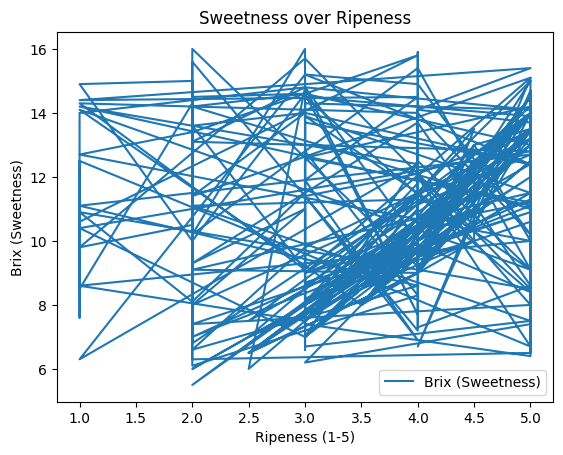

In [30]:
df.plot(kind='line', x='Ripeness (1-5)', y='Brix (Sweetness)')   #Line
plt.title('Sweetness over Ripeness')
plt.xlabel('Ripeness (1-5)')
plt.ylabel('Brix (Sweetness)')
plt.show()

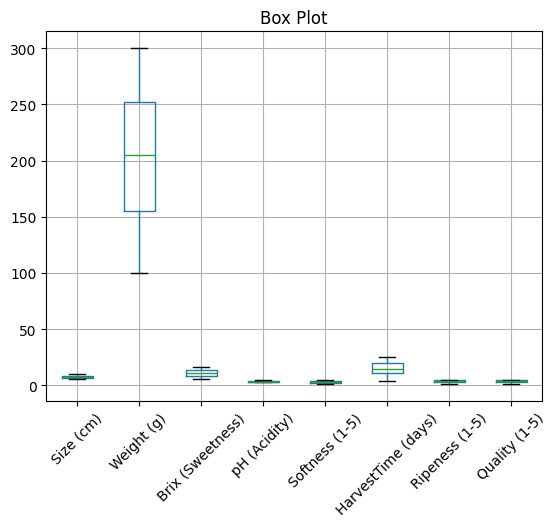

In [27]:
df.boxplot()                            #Box
plt.title('Box Plot')
plt.xticks(rotation=45)  #x-axis labels rotated for better readability
plt.show()

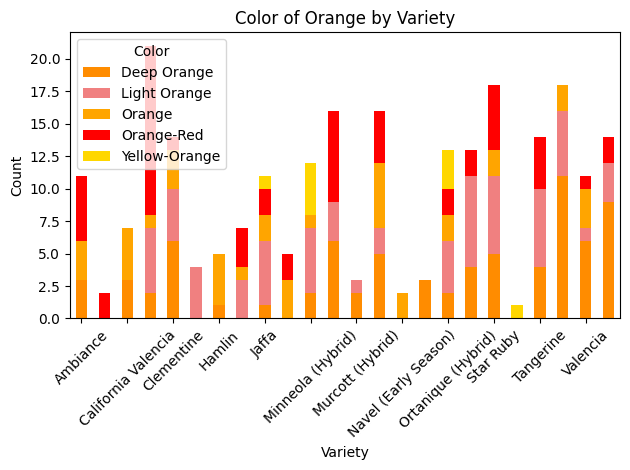

In [31]:
color_map = {                                                               #stacked bar
    'Orange': 'orange',
    'Deep Orange': 'darkorange',
    'Light Orange': 'lightcoral',
    'Orange-Red': 'red',
    'Yellow-Orange': 'gold'
}

stacked_data = df.groupby(['Variety', 'Color']).size().unstack(fill_value=0)   

stacked_data.plot(kind='bar', stacked=True, color=[color_map.get(c, 'gray') for c in stacked_data.columns])
plt.title('Color of Orange by Variety')
plt.xlabel('Variety')
plt.ylabel('Count')
                     #Displaying every nth x-axis label and adjusting layout to prevent clipping of labels
n = 2  
plt.xticks(range(0, len(stacked_data.index), n), stacked_data.index[::n], rotation=45, fontsize=10)

plt.legend(title='Color')
plt.tight_layout() 
plt.show()

In [29]:
# CONCLUSION

# The weight of oranges varies across the dataset, ranging from 100g to 300g, with a mean weight of approximately 205g and 
# a median weight of 205g. The weight distribution is relatively symmetric with a moderate interquartile range (IQR) of 
# approximately 97g. There appears to be a positive correlation between sweetness (measured in Brix) and ripeness
# (rated on a scale from 1 to 5). This is supported by the correlation coefficient calculated, indicating that as the 
# ripeness increases, sweetness tends to increase as well. 

# There is a positive relationship between the size of oranges (measured in cm) and their weight (measured in grams), as
# indicated by the scatter plot, larger oranges tend to weigh more which is an expected observation. The color distribution
# of oranges in the dataset is diverse, with various shades of orange, red, and yellow. The majority of oranges are 
# categorized as "Deep Orange" followed by "Light Orange", while other colors such as "Orange," "Orange-Red," and 
# "Yellow-Orange" are also present but less frequent. Different colors of oranges have slightly different average weights, 
# for instance, "Orange-Red" oranges tend to have a higher average weight compared to other colors. This could be useful 
# information for quality control or market segmentation purposes.

# The dataset contains various orange varieties, each with different characteristics. The stacked bar plot shows the 
# distribution of colors within each variety, providing insights into the diversity of oranges available.

# In conclusion, the analysis provides valuable insights into the characteristics and distribution of oranges in the 
# dataset, which could aid in decision-making in areas such as agricultural practices, marketing strategies, and quality 
# assurance.

In [ ]:
# REFLECTION

# Reflecting on the completion of the previous assignment, it was clear that my proficiency in Excel was not as robust as 
# I initially thought. Despite encountering challenges due to the instruction of prohibition of use of built-in functions 
# in Excel, the assignment served as a great challenge, stimulating a deeper understanding of data manipulation techniques. 
# In contrast, using Python for the same task proved more manageable, given my proficiency in the language. As a result, 
# the time invested in completing the Python-based assignment was notably lower compared to that of Excel.

# The choice between utilizing Python or Excel lies upon various factors including the complexity of the data, the specific 
# analytical requirements, the user's proficiency, and the objectives of the analysis. Python excels in scenarios 
# necessitating complex analysis, automation, and seamless integration with diverse tools. Conversely, Excel proves 
# advantageous for swift, uncomplicated analyses, particularly catering to users who lack programming expertise.

# Given the opportunity to revisit the assignment, I would dedicate further exploration into the vast array of libraries 
# available in Python. Strengthening my knowledge of libraries such as Pandas, Statistics, and others utilized in the 
# assignment would enhance my capabilities in conducting descriptive analyses. Additionally, I acknowledge a potential gap 
# in my understanding of certain statistical concepts, motivating me to pursue a deeper comprehension of descriptive 
# analysis and explore additional Python libraries to proficiently visualize data.

# In conclusion, the recent assignment underscored the advantages of leveraging Python for data analysis tasks, 
# particularly in comparison to Excel, while also highlighting areas for personal growth and development in statistical 
# analysis and Python programming.